## Data exploration for MSc5_research_project 

This jupyter notebook deals with exploring the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master. 

The main idea of the project is to use machine learning in order to predict whether a person can be classified either as a healthy control or a patient with psychotic disorder based on cortical features that are associated with brain network development.



## Table of contents

The notebook is structured as followed.

### **1. Data access**
### **2. What does the data contain?**
### **3. Exploring the different modalities**
        3.1 DTI Networks
            3.1.1 Downloading the .mat files
            3.1.2 Read the .mat files
        3.2 Regional mean diffusivity (MD) and functional anisotropy (FA) values
        3.3 sMRT: Cortical thickness (CT)


### 1. Data access

The data set is available on figshare (see link) and was used for the paper "Functional MRI connectivity accurately distinguishes cases with psychotic disorders from healthy controls, based on cortical features associated with brain network development" (Young et al., 2020). https://doi.org/10.1101/19009894

https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550 

Further, the github repository for the above mentioned study can be accessed via the following link: https://github.com/jmyoung36/fMRI_connectivity_accurately_distinguishes_cases




### 2. What does the data contain?

The pre-processed data contains five MRI metrics being regional CT (cortical thickness), MD (mean diffusivity) and FA (functional anisotropy) values as well as DTI networks. There are datasets for different locations. CT is available for the Maastricht, Dublin and Cobre datasets whereas MD, FA and DTI are available for the Maastricht and Dublin datasets. Demographic data is also provided.

### 3. Exploring the different modalities

First of all, I am going to explore the DTI network data, followed by the regional MD and FA values and lastly the CT data.

### 3.1 DTI Networks

The data that contains the DTI networks are available as matlab files. In the following, it is depicted how the matlab files can be downloaded and read.

####  3.1.1 Download the .mat files

If you click on the name of the matlab datafile on figshare , it then only shows you the preview of the matlab file and the link of that is for the respective preview. If you want to copy the link of the matlab file itself, you have to right-click on the datafile name and then copy the link.

In [2]:
import urllib.request

In [3]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/ndownloader/files/22782440"
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat',
 <http.client.HTTPMessage at 0x7ff5b82f7e10>)

In [4]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550?file=22782443" 
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat',
 <http.client.HTTPMessage at 0x7ff5a8021208>)

#### 3.1.2 Read the .mat files

In [5]:
import scipy.io

**Dublin**

In [6]:
DTI_Dublin = scipy.io.loadmat('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

In [7]:
DTI_Dublin.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])

In [8]:
DTI_Dublin['nostreamlines_new'].shape

(1, 123)

123 Probanden mit DTI Matrizen.
Wie sehen DTI Matrizen aus?

In [9]:
DTI_Dublin['nostreamlines_new'][0].shape

(123,)

In [10]:
DTI_Dublin['nostreamlines_new'][0][0].shape

(308, 308)

Zwischen 308 Regionen basierend auf DTI Daten Werte (siehe course website, nochmal durchlesen!!)

<AxesSubplot:>

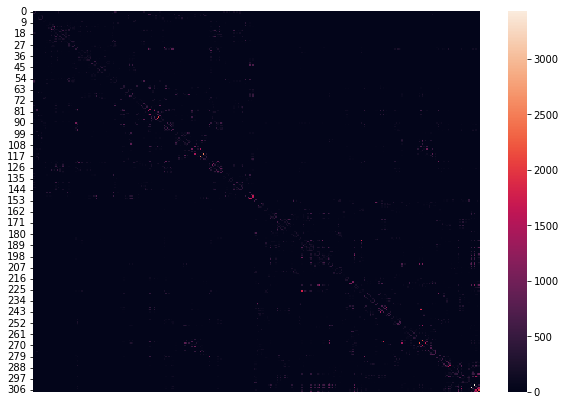

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(DTI_Dublin['nostreamlines_new'][0][0], xticklabels=False, cmap='rocket')

**Maastricht**

In [12]:
DTI_Maastricht = scipy.io.loadmat('/Users/mello/Desktop/Dataset//DTI_Maastricht.mat')

In [13]:
DTI_Maastricht.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])

### 3.2 Regional Mean diffusivity (MD) and functional anisotropy (FA) values

In [14]:
import pandas as pd

In [15]:
MD_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_MD_cortexAv_mean_Dublin.csv', delimiter = ',')
MD_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_MD_cortexAv_mean_Maastricht.csv', delimiter = ',')

In [16]:
FA_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_FA_cortexAv_mean_Dublin.csv', delimiter = ',')
FA_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_FA_cortexAv_mean_Maastricht.csv', delimiter = ',')

In [17]:
MD_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.911,0.931,0.891,1.048,0.881,0.939,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,CON3891,33,2,1,0.861,0.913,0.846,0.927,0.888,0.894,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,CON4664,40,2,1,0.817,0.827,0.828,0.828,0.780,0.843,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,CON7009,21,1,1,0.887,0.905,0.878,0.932,0.820,0.888,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,CON7024,59,1,1,0.887,0.854,0.905,1.011,0.946,0.922,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.843,0.855,0.940,1.017,0.954,0.840,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,RPG9103,37,1,2,0.911,0.914,0.926,1.001,0.918,1.115,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,RPG9119,41,1,2,0.890,0.899,0.886,0.930,0.883,0.882,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,RPG9121,51,1,2,0.920,0.986,0.883,0.879,0.794,0.983,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [18]:
FA_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.322,0.147,0.200,0.143,0.189,0.133,...,0.171,0.150,0.127,0.218,0.163,0.158,0.147,0.157,0.147,0.137
1,CON3891,33,2,1,0.302,0.155,0.234,0.139,0.164,0.145,...,0.155,0.139,0.121,0.185,0.173,0.126,0.151,0.152,0.148,0.152
2,CON4664,40,2,1,0.324,0.180,0.226,0.197,0.206,0.142,...,0.176,0.143,0.150,0.173,0.228,0.144,0.150,0.171,0.174,0.143
3,CON7009,21,1,1,0.323,0.139,0.219,0.154,0.200,0.147,...,0.146,0.128,0.147,0.195,0.174,0.134,0.171,0.164,0.159,0.131
4,CON7024,59,1,1,0.295,0.143,0.168,0.139,0.173,0.171,...,0.156,0.140,0.135,0.325,0.168,0.162,0.167,0.144,0.138,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.294,0.168,0.238,0.142,0.167,0.162,...,0.144,0.117,0.105,0.199,0.157,0.127,0.136,0.143,0.147,0.134
111,RPG9103,37,1,2,0.293,0.140,0.257,0.151,0.170,0.125,...,0.132,0.106,0.114,0.257,0.164,0.134,0.153,0.157,0.144,0.140
112,RPG9119,41,1,2,0.323,0.173,0.278,0.171,0.188,0.170,...,0.167,0.139,0.143,0.172,0.170,0.157,0.150,0.181,0.143,0.151
113,RPG9121,51,1,2,0.311,0.174,0.226,0.153,0.178,0.127,...,0.145,0.126,0.136,0.158,0.270,0.135,0.140,0.162,0.145,0.123


### 3.3 sMRT: cortical thickness

For the macro-structural data T1-weighted images were used and the surface was parcellated according to a template derived from the Desikan-Killiany atlas into 308 regions. For each of those regions cortical thickness was estimated. Before getting a deeper look into those data, first the atlas is loaded.

In [19]:
CT_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')
CT_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Maast.csv', delimiter = ',')
CT_Cobre = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Cobre.csv', delimiter = ',')

In [23]:
my_list = list(CT_Dublin)
my_list

['Subject ID',
 'Age',
 'Sex',
 'Group',
 'lh_bankssts_part1_thickness',
 'lh_bankssts_part2_thickness',
 'lh_caudalanteriorcingulate_part1_thickness',
 'lh_caudalmiddlefrontal_part1_thickness',
 'lh_caudalmiddlefrontal_part2_thickness',
 'lh_caudalmiddlefrontal_part3_thickness',
 'lh_caudalmiddlefrontal_part4_thickness',
 'lh_cuneus_part1_thickness',
 'lh_cuneus_part2_thickness',
 'lh_entorhinal_part1_thickness',
 'lh_fusiform_part1_thickness',
 'lh_fusiform_part2_thickness',
 'lh_fusiform_part3_thickness',
 'lh_fusiform_part4_thickness',
 'lh_fusiform_part5_thickness',
 'lh_inferiorparietal_part1_thickness',
 'lh_inferiorparietal_part2_thickness',
 'lh_inferiorparietal_part3_thickness',
 'lh_inferiorparietal_part4_thickness',
 'lh_inferiorparietal_part5_thickness',
 'lh_inferiorparietal_part6_thickness',
 'lh_inferiorparietal_part7_thickness',
 'lh_inferiorparietal_part8_thickness',
 'lh_inferiortemporal_part1_thickness',
 'lh_inferiortemporal_part2_thickness',
 'lh_inferiortemporal_